### Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [2]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Preprocessing:

In [3]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [4]:
dataoveriew(df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 418

Number of features: 12

Features:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing values: 414

Unique values:
PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


C:\Users\Sulaim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sulaim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


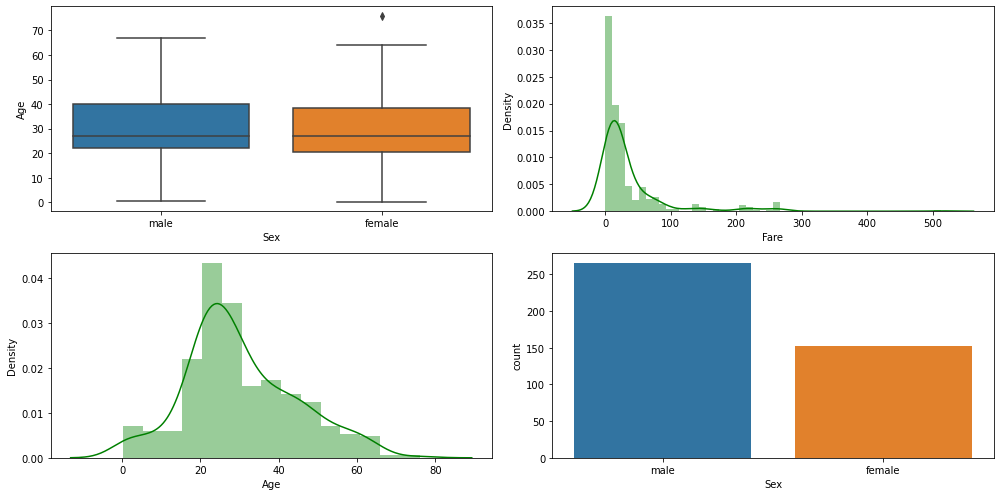

In [7]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= df)

plt.subplot(2,2,2)
sns.distplot(df['Fare'],color='g')

plt.subplot(2,2,3)
sns.distplot(df['Age'],color='g')

plt.subplot(2,2,4)
sns.countplot(x='Sex', data=df)

plt.tight_layout()
plt.show()


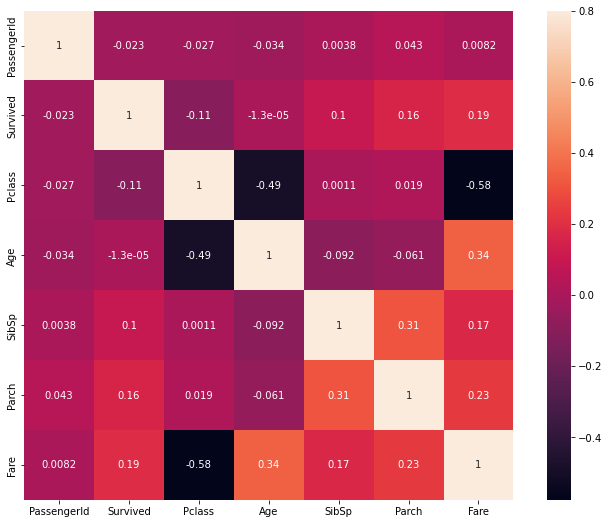

In [8]:
# Heatmap
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

###  Feature Engineering:

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df.drop(columns=['PassengerId','Name','Embarked','Cabin'],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [12]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
dtype: int64

In [13]:
# Filled the missing value in Age column with the median value
df['Age'] = df['Age'].fillna(df['Age'].median())

# Filled the missing value in Fare columns with median Value
df['Fare'] = df['Fare'].fillna(df['Fare'].median())


In [14]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

C:\Users\Sulaim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sulaim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


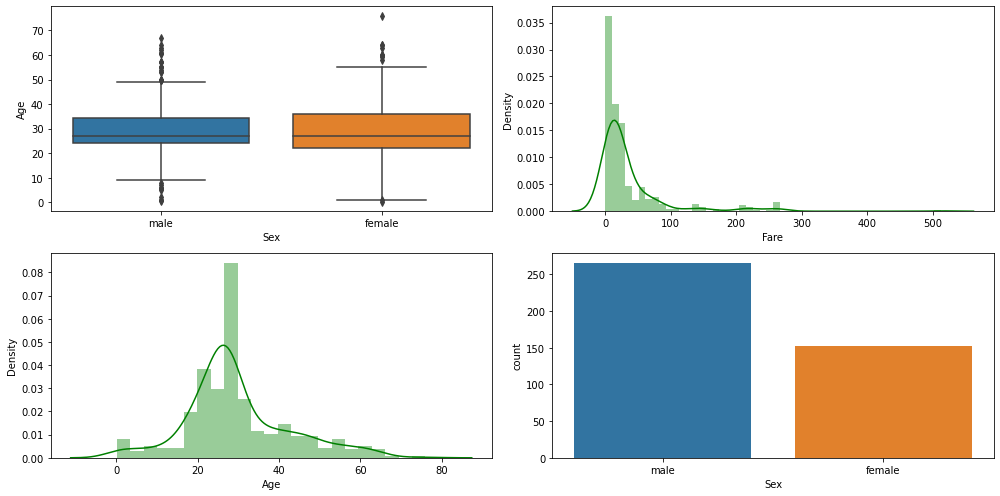

In [15]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= df)

plt.subplot(2,2,2)
sns.distplot(df['Fare'],color='g')

plt.subplot(2,2,3)
sns.distplot(df['Age'],color='g')

plt.subplot(2,2,4)
sns.countplot(x='Sex', data=df)

plt.tight_layout()
plt.show()


In [16]:
df[df['Age']>=60]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
2,0,2,male,62.0,0,0,240276,9.6875
13,0,2,male,63.0,1,0,24065,26.0000
48,1,1,female,60.0,0,0,11813,76.2917
69,1,1,female,60.0,1,4,19950,263.0000
81,0,1,male,67.0,1,0,PC 17483,221.7792
96,1,1,female,76.0,1,0,19877,78.8500
114,1,1,female,63.0,1,0,PC 17483,221.7792
142,0,1,male,61.0,1,3,PC 17608,262.3750
152,0,3,male,60.5,0,0,3701,14.4542
179,1,1,female,64.0,0,2,PC 17756,83.1583


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [18]:
label_encoder = LabelEncoder()
# Apply Label Encoding to 'Sex' column
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,1,34.5,0,0,330911,7.8292
1,1,3,0,47.0,1,0,363272,7.0000
2,0,2,1,62.0,0,0,240276,9.6875
3,0,3,1,27.0,0,0,315154,8.6625
4,1,3,0,22.0,1,1,3101298,12.2875


In [20]:
# Extract numeric part from 'Ticket' column using regular expressions
df['Ticket'] = df['Ticket'].apply(lambda x: re.sub(r'\D', '', x))

In [21]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

In [22]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,3,1,34.5,0,0,330911,7.8292
1,3,0,47.0,1,0,363272,7.0000
2,2,1,62.0,0,0,240276,9.6875
3,3,1,27.0,0,0,315154,8.6625
4,3,0,22.0,1,1,3101298,12.2875


In [23]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [24]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building:

In [28]:
# List of models
models = {
    
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
   
}

In [29]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred)  # Compute classification report
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

Decision Tree - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        32

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Random Forest - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        32

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84




### Results:


"Decision Tree" and "Random Forest" has the highest accuracy (0.1) among the models.